# Linear regression
We perform standard ordinary least-squares linear regression on scalar univariate data (i.e. dependent and independent variables are both one-dimensional).  We illustrate the effect of outliers.

# References
Statistical modelling:
- [linear regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (scikit-learn)
- [generate data for regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py) (scikit-learn)
- [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (scikit-learn)

Visualization:
- [matplotlib axes legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.legend.html)
- [colors in matplotlib](https://matplotlib.org/users/colors.html)

---
tags: statistics, linear regression, visualization, scikit-learn, R-squared, coefficient of determination

# Imports

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [2]:
COLOR_X = 'tab:purple'
COLOR_y = 'tab:grey'

COLOR_SAMPLES = 'tab:blue'
COLOR_OUTLIERS = 'tab:red'
COLOR_PREDS = 'tab:orange'
COLOR_TARGS = 'tab:green'

# Data
Create data with `n_samples` points.  Data is (here) 1-dimensional: `n_features=1`.  Replace `n_outliers` points with outliers to see effect on regression.  Calculate values of underlying model, `targs`, using `coef` returned by `make_regression`.

In [4]:
n_samples = 200
n_features = 1
noise = 30
n_outliers = 10

X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, coef=True)

# Replace a subset with outliers
idxs = np.random.permutation(np.arange(len(X)))[:n_outliers]
X[:n_outliers] = X[idxs]
y[:n_outliers] = -y[:n_outliers]

# Targets
targs = coef * X

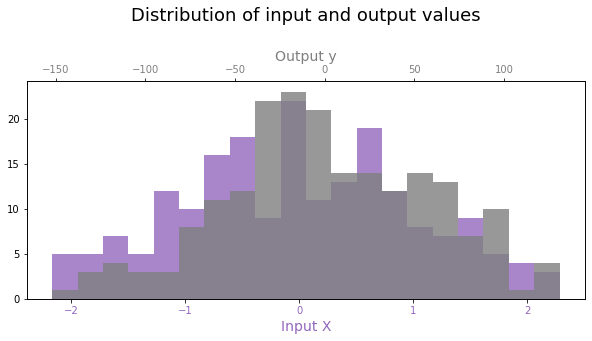

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
bins = 20
ax.hist(X, bins, alpha=0.8, color=COLOR_X);
ax.set_xlabel("Input X", fontsize=14, color=COLOR_X)
ax.tick_params(axis='x', labelcolor=COLOR_X);
ax_y = ax.twiny()
ax_y.hist(y, bins, alpha=0.8, color=COLOR_y);
ax_y.set_xlabel("Output y", fontsize=14, color=COLOR_y)
ax_y.tick_params(axis='x', labelcolor=COLOR_y);

ax.set_title("Distribution of input and output values", fontsize=18, y=1.25);

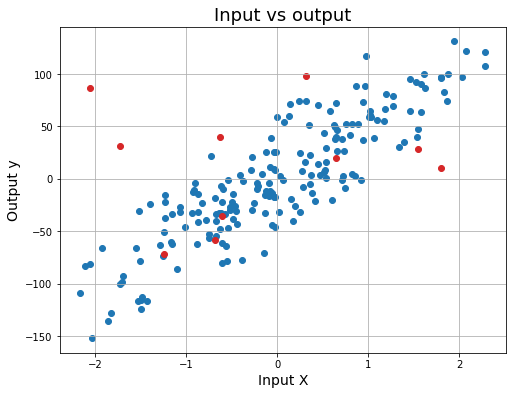

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[n_outliers:], y[n_outliers:], color=COLOR_SAMPLES, label='samples')
ax.scatter(X[:n_outliers], y[:n_outliers], color=COLOR_OUTLIERS, label='outliers')
ax.set_title("Input vs output", fontsize=18);
ax.set_xlabel("Input X", fontsize=14);
ax.set_ylabel("Output y", fontsize=14);
ax.grid();

# Fit linear regressor

In [7]:
lr = LinearRegression()
lr.fit(X, y);

# Make predictions

In [8]:
line_X = np.arange(X.min(), X.max()  +1)[:, None]
preds = lr.predict(line_X)

# Metrics

$R^2$ score of predictions with respect to target values:

In [9]:
lr.score(X, y)

0.6810041553143995

Mean squared error (MSE) and root mean squared error (RMSE):

In [10]:
mean_squared_error(targs, y), np.sqrt(mean_squared_error(targs, y))

(1080.509061376172, 32.871097660044335)

# Visualization

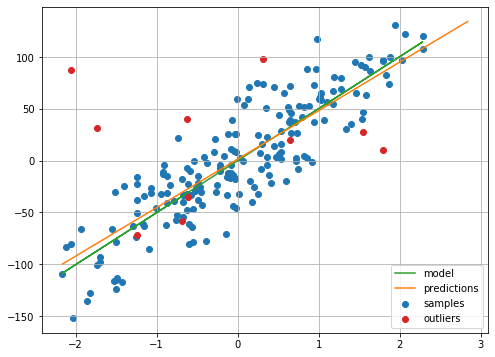

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[n_outliers:], y[n_outliers:], color=COLOR_SAMPLES, label='samples')
ax.scatter(X[:n_outliers], y[:n_outliers], color=COLOR_OUTLIERS, label='outliers')
ax.plot(X, targs, color=COLOR_TARGS, label='model')
ax.plot(line_X, preds, color=COLOR_PREDS, label='predictions')
ax.legend()
ax.grid()